$$
\newcommand{theorem}{\textbf{Theorem: }}
\newcommand{proof}{\textbf{Proof: }}
$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from common.utility import show_implementation

np.random.seed(42)

# Sampling
**Population** is the set of all possible outcomes/observations of an experiment/survey.
A **sample** is any subset of a population.
A population can be:
* finite
    * consists of a finite number of elements
    * *eg*, the cards in a deck, all the people of a country
* infinite
    * consists of an infinitely large number of elements
    * *eg*, result of a coint flip (can be infinitely generated)
    * *eg*, the position of an object (the coordinate position can have infinite precision)
    



## Simple random sample
A **sample** of size $n$ is obtained by taking taking a set of $n$ observations from a given population.

We assume that each observation is a value of a random variable that follows some probability distribution.

A **simple random sample** is a sample that is chosen such that every subset of $n$ observation in the population has an equal probability of being selected.

### Sampling without replacement
Suppose that we wish to obtain a sample from the population without replacement.
*eg* we want to select 5 distinct people out of 100 people.


Given a population of size $N$, and a desired sample of size $n$, by [combinatorics](), we know that there are $C^N_n$ possible samples.

Thus, we assign a label to each of combination and perform the choosing algorithm as described previously.

**Example**

Suppose that we wish to sample 2 items out of $\{A, B, C\}$.
1. Consider all the combinations, that is $\{AB, AC, BC\}$
2. Label each combination a unique number between 1 to 3.
3. Generate a distinct random numbers between 1 to 3.
4. Pick the combination corresponding to the generated numbers to obtain our sample.

---

<span hidden>TODO: Add links</span>

### Sampling with replacement
Suppose, instead, that we wish to obtain a sample from the population with replacement.
*eg* we want to select 5 people out of 100 people, but the same person can be selected multiple times.

Given a population of size $N$, and a desired sample of size $n$, by [combinatorics](), we know that there are $N^n$ possible samples.



**Example**

Suppose that we wish to sample 2 items out of $\{A, B, C\}$.
1. Consider all the combinations, that is $\{AA, AB, AC, BA, BB, BC, CA, CB, CC\}$
2. Label each combination a unique number between 1 to 9.
3. Generate a distinct random numbers between 1 to 9.
4. Pick the combination corresponding to the generated numbers to obtain our sample.

---


<span hidden>TODO: Add links</span>

## Sampling from an infinite population
When the population is finite, we can easily obtain samples in such a way that each subset of the population has an equal probability of being selected.
We achieved this by assigning a probability to each subset based on the size of the population
(*ie* what we have done above).
However, this is not possible with an infinite population.

**Example**

In an experiment where we collect the number of heads obtained in 10 coin tosses, notice that the population is infinite, because we can always perform another experiment to obtain another observation.
Hence, it is impossible for us to perform our previous approach of labeling each sample (of 10 coin tosses), generating a random number, and choosing that sample.

## Sampling distribution of sample mean
Recall that our goal of selecting random samples is to obtain information about some unknown population parameters.
These parameters could be the mean or variance of the population.

We obtain a large random sample, then based on the information obtain from this sample, we draw inference on the true value of the population parameters.
For example, we wish to know how many people in the country likes cats, we survey a small subset of this population, then based on this subset, we can make some assertions on the proportion of the country's population that likes cat.

**Statistic** is the value obtain from a sample.
Since each observation is determined by a random variable, the statistic will also vary, and thus is also a random variable.

**Sampling distribution** is the probability distribution of a statistic.

### Sample mean
Given a random sample $X_1, X_2, \dots, X_n$ of size $n$, the **sample mean** is defined as
$$
\bar X = \frac{1}{n}\sum^n_{i=1} X_i
$$

Note that the sample mean is also a random variable, thus we can obtain the mean and variance of the distribution.

**Example**

Suppose that our population has the following values $\{1, 2, 3, 4, 5\}$.

From the [random variable chapter](./random_variables.ipynb#aggregate), we can compute that the population mean and population variance is $\mu_X = 3$ and $\sigma^2 _X = 2$

Now, suppose that we draw a sample of size 2 (with replacement).
To obtain the sample mean, we can first iterate all possible samples of size 2, and compute the $\bar X$ for each sample.

|Samples| $$\bar X$$| $$Pr(\bar X = \bar x)$$
| :---- | ---- | --- |
|(1, 1) | 1 | 1/25 |
|(1, 2), (2, 1) | 1.5 | 2/25 |
|(1, 3), (3, 1), (2,2) | 2 | 3/25 |
|(1, 4), (4, 1), (2,3), (3,2) | 2.5 | 4/25 |
|(1, 5), (5, 1), (2,4), (4,2), (3,3) | 3 | 5/25 |
|(2, 5), (5, 2), (3,4), (4,3) | 3.5 | 4/25 |
|(3, 5), (5, 3), (4,4) | 4 | 3/25 |
|(4, 5), (5, 4) | 4.5 | 2/25 |
|(5, 5) | 5 | 1/25|

Hence, with this table, we obtained the distribution of $\bar X$.
We can treat is as just another probability distribution and obtain the mean.

$$
\mu_{\bar X} = E(\bar X) = \sum \bar x f_{\bar X}(\bar x) = 
1\left(\frac{1}{25}\right) + 
1.5\left(\frac{2}{25}\right) + 
\dots +
5\left(\frac{1}{25}\right) =  3
$$

$$
\sigma ^x _{\bar X} = E(\bar X^2) - E(\bar X) ^2 = 4
$$

---

**Theorem**

Given an infinite population or finite population with replacement that has population mean of $\mu$ and population variance of $\sigma ^2$; when random samples of size $n$ is drawn, the sampling distribution of the sample mean $\bar X$ has the following properties,
$$
\mu _{\bar X} = \mu_X \quad \sigma ^2_{\bar X} = \frac{\sigma_X^2}{n} 
$$

## Law of large numbers
Suppose that we obtain a sample of size $n$ from a population with mean $\mu$ and some **finite** population variance $\sigma ^2$.
The **law of large number** states that for any $\epsilon \in \mathbb{R}$
$$
Pr(|\bar X - \mu| > \epsilon) \to 0 \quad \text{as } n \to \infty
$$

**Corollary**
$$
Pr(|\bar X - \mu| < \epsilon) \to 1 \quad \text{as } n \to \infty
$$

In other words, as the same size gets larger, it becomes more likely that the sample mean is closer to the population mean.

Now, we will look at the behaviour as we increase the sample size taken from some known distributions.

In [2]:
import module.distribution.distribution as dist
import numpy as np


def sample(f, domain, n=1):
    ps = np.vectorize(f)(domain)
    return np.random.choice(domain, p=ps / ps.sum(), size=n)


def show_prob(func, domain, it=3):
    for i in range(it):
        n = 100 ** (i + 1)
        mu_X = sample(func, domain, n).mean()
        print(f"n = {n:<8}: Sample mean is {mu_X}")

In [3]:
d = dist.uniform()
domain = np.arange(11)
print(f"Population mean is {domain.sum()/11}")
show_prob(d.fx(domain), domain)

Population mean is 5.0
n = 100     : Sample mean is 4.69
n = 10000   : Sample mean is 4.9358
n = 1000000 : Sample mean is 5.003994


In [4]:
d = dist.binomial()

p = 0.3
n = 10
print(f"Population mean is {n * p}")
show_prob(d.fx(n, p), np.arange(11))

Population mean is 3.0
n = 100     : Sample mean is 3.01
n = 10000   : Sample mean is 3.0102
n = 1000000 : Sample mean is 2.997507


In [5]:
d = dist.negative_binomial()

p = 0.3
k = 10
print(f"Population mean is {k / p}")
# use range up to 1000 to approximate upper unbounded domain
show_prob(d.fx(k, p), np.arange(1000))

Population mean is 33.333333333333336
n = 100     : Sample mean is 30.98
n = 10000   : Sample mean is 33.4871
n = 1000000 : Sample mean is 33.336333


In [6]:
d = dist.poisson()

lamb = 2
print(f"Population mean is {lamb}")
# use range up to 10 to approximate upper unbounded domain
show_prob(d.fx(lamb), np.arange(10))

Population mean is 2
n = 100     : Sample mean is 1.94
n = 10000   : Sample mean is 2.0097
n = 1000000 : Sample mean is 2.000683


Notice that for all our showcase above, it supports the validity of the law of large numbers.

## Central limit theorem
Once again, suppose that we obtain a sample of size $n$ from a population with mean $\mu$ and some **finite** population variance $\sigma ^2$.

The **central limit theorem** states that $\bar X$ is **approximately normal** with mean $\mu$ and variance $\frac{\sigma^2}{n}$ if $n$ is **sufficiently large**.

And we can perform [standardization](./probability_distributions.ipynb#standardization), and hence
$$
Z = \frac{\bar X - \mu}{\sigma / \sqrt{n}} \sim N(0,1) \text{ approximately}
$$

In [7]:
from math import sqrt
from module.distribution.probability_function import normal


def plot_samples(sampler, mu, sigma, num_samples=10000):
    _, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), sharey=True)
    xs = np.linspace(-5, 5)
    ys = normal()(xs)
    for sample_size, ax in zip([10, 100, 1000, 10000], axs):
        sample_means = np.array(
            [sampler(sample_size).mean() for _ in range(num_samples)]
        )
        ax.hist(
            (sample_means - mu) / (sigma / sqrt(sample_size)), bins=50, density=True
        )
        ax.plot(xs, ys, label="plot of N(0,1)")
        ax.set_title(f"Sample size = {sample_size}")
    plt.legend()

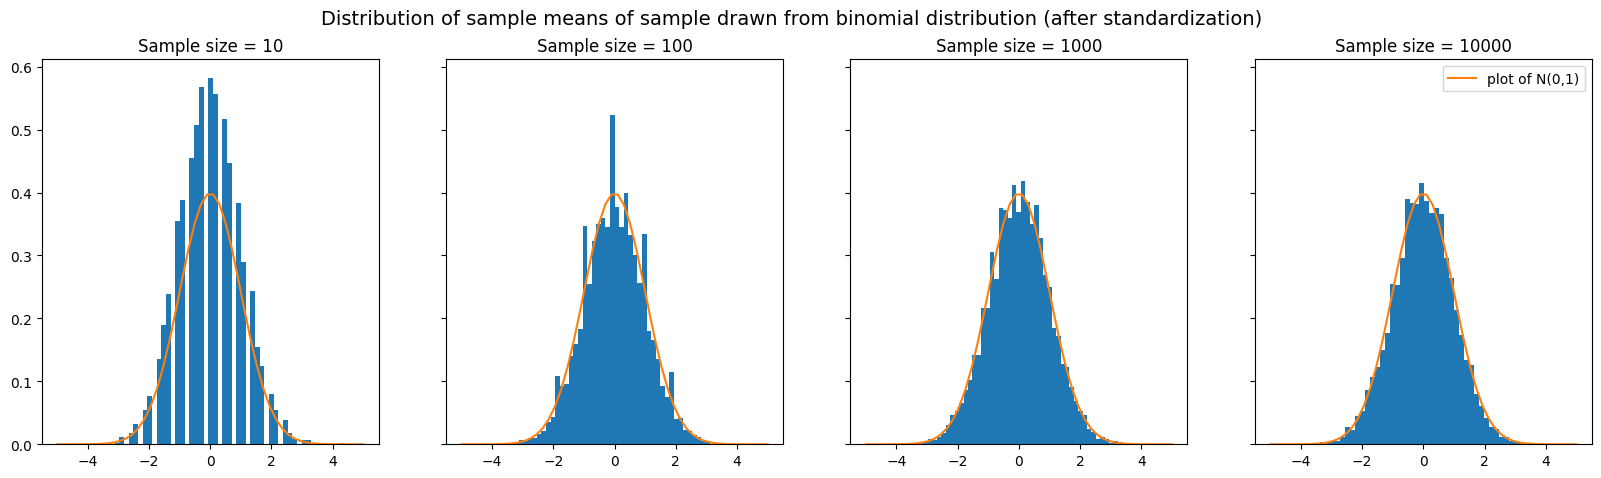

In [8]:
p = 0.3
n = 10
d = dist.binomial().fx(n, p)
domain = np.arange(11)

plot_samples(
    lambda sample_size: sample(d, domain, sample_size),
    mu=n * p,
    sigma=sqrt(n * p * (1 - p)),
)
plt.suptitle(
    "Distribution of sample means of sample drawn from binomial distribution (after standardization)",
    fontsize=14,
)
plt.show()

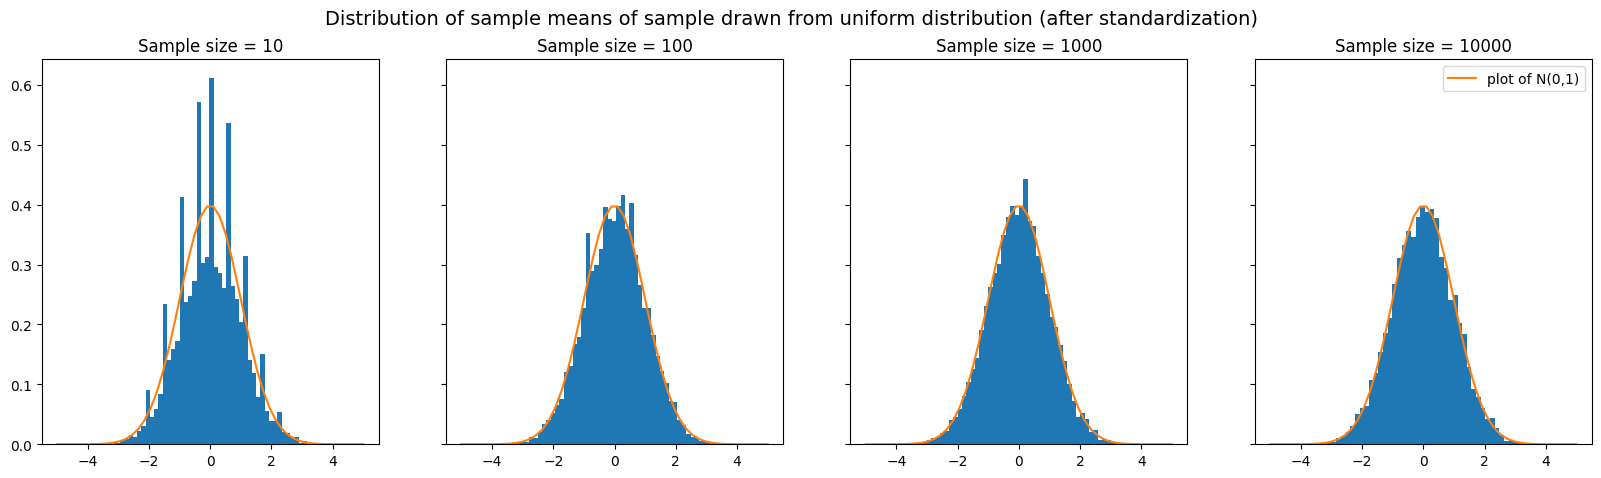

In [9]:
domain = np.arange(10)
d = dist.uniform().fx(domain)


plot_samples(
    lambda sample_size: sample(d, domain, sample_size),
    mu=domain.sum() / 10,
    sigma=sqrt(((domain - domain.sum() / 10) ** 2).sum() / 10),
)
plt.suptitle(
    "Distribution of sample means of sample drawn from uniform distribution (after standardization)",
    fontsize=14,
)
plt.show()

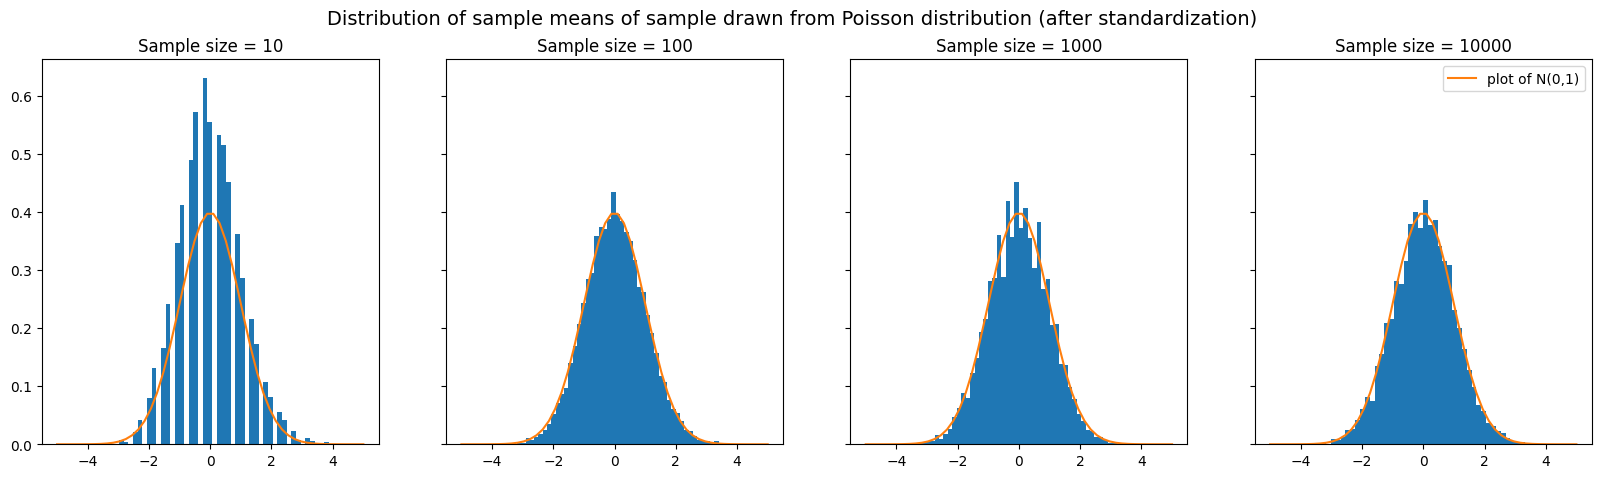

In [10]:
domain = np.arange(15)
lamb = 2
d = dist.poisson().fx(lamb)

plot_samples(
    lambda sample_size: sample(d, domain, sample_size), mu=lamb, sigma=sqrt(lamb)
)
plt.suptitle(
    "Distribution of sample means of sample drawn from Poisson distribution (after standardization)",
    fontsize=14,
)
plt.show()

As we can see, the distribution of our sample means seems to follow a seemingly normal distribution (albeit with some outliers).
This happens even for population distributions which does not remotely resembles a normal distribution, such as the discrete uniform distribution.
Hence, this supports the central limit theorem, where the sample mean (with sufficient sample size) follows a normal distribution, regardless of the underlying population distribution.

## Sampling distribution from normal population
If $X_i \sim N(\mu, \sigma^2)$ for all $i$ (that is, all observations are drawn from the same **normal** distribution), then $\bar X \sim N(\mu, \sigma ^2 /n)$ for any sample size $n$.

If all $X_i \sim N(\mu, \sigma^2)$ approximately, then $\bar X \sim N(\mu, \sigma^2/n)$ approximately.

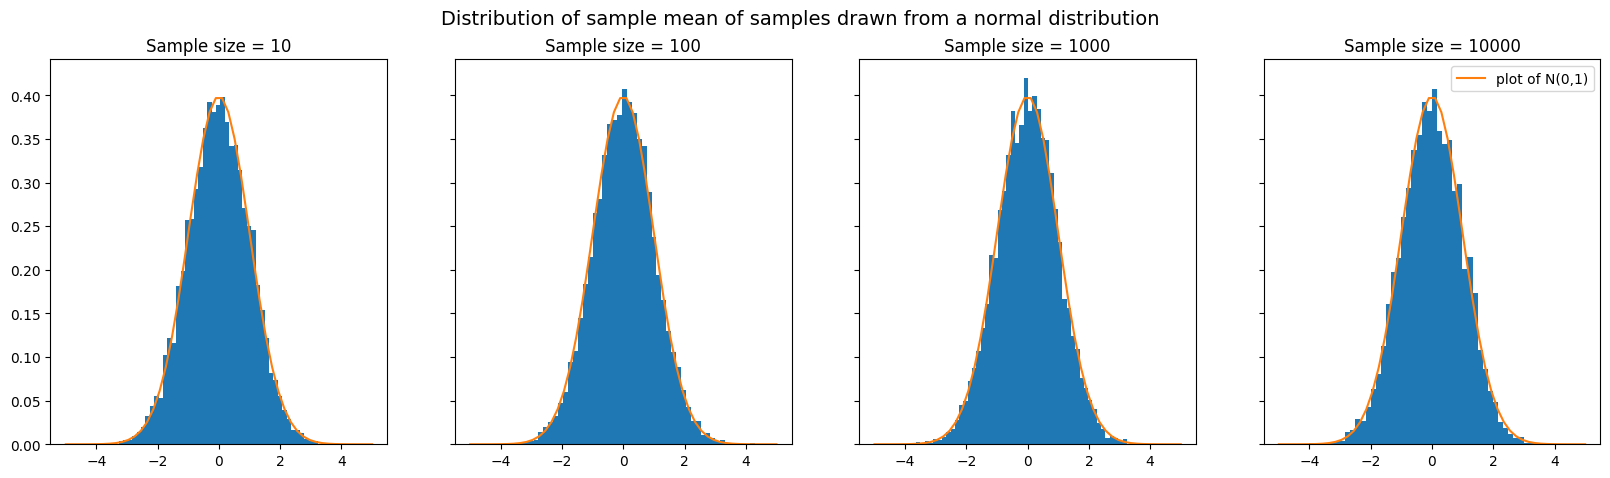

In [11]:
from scipy.stats import norm

mu = 1
sigma = 1.5

# we used the scipy library for the sampling because sampling across a continuous distribution is non-trivial
plot_samples(
    lambda sample_size: norm.rvs(size=sample_size, loc=mu, scale=sigma), mu, sigma
)
plt.suptitle(
    "Distribution of sample mean of samples drawn from a normal distribution",
    fontsize=14,
)
plt.show()

Notice that the distribution of the sample means closely fit the normal distribution, even for small sample size.

## Sampling distribution of difference of two sample means <span id="mean-diff"/>
Suppose that we have two populations with means $\mu_1, \mu_2$ and $\sigma^2_1, \sigma^2_2$ respectively.
If we samples of size $n_1, n_2$ from each respective population, then the sampling distribution of the difference of sample means $\bar X_1 - \bar X_2$, is **approximately** normally distributed with the following parameters,
$$
\mu_{\bar X_1 - \bar X_2} = \mu_1 - \mu_2 \quad \sigma^2_{\bar X_1 - \bar X_2} = \frac{\sigma^2_1}{n_1} + \frac{\sigma^2_2}{n_2}
$$

<details>
<summary style="color: blue">$\proof$ (Click to expand)</summary>
<div style="background: aliceblue">
Since $X_1$ and $X_2$ are drawn from different population, we can assume that the random variables associated with the two means are independent of each other.
Thus
    $$
\begin{align}
\mu_{\bar X_1 - \bar X_2} &= E(\bar X_1 - \bar X_2)  \\
&= \sum_x \sum_y (x - y) f_{X, Y}(x, y) \\
&= \sum_x \sum_y x f_{X, Y}(x, y) - \sum_x \sum_y y f_{X, Y}(x, y) \\
&= \sum_x x \sum_y f_{X, Y}(x, y) - \sum_y y \sum_x f_{X, Y}(x, y) \\
&= \sum_x x f_{X}(x) - \sum_y y f_{Y}(y) \\
&= \mu_{\bar X_1} - \mu_{\bar X_2}\\
\end{align} \\
$$
    
---

Using $V(aX+bY) = a^2V(X) + b^2V(Y) + 2ab Cov(X,Y)$

$$
\begin{align}
V(aX+bY) &= a^2V(X) + b^2V(Y) + 2ab Cov(X,Y) & \\
V(X - Y) &= V(X) + V(Y) + 2ab Cov(X,Y) & \\
&= V(X) + V(Y) & Cov(X,Y) = 0 \text{ when X,Y are independent} \\
\end{align} \\
$$
    
Using the central limit theorem, we know that $V(\bar X_1) = \frac{V(X)}{n_1}$, and similarly for $V(\bar X_2)$.
And it follows from the above 2 results.
    $$QED$$
    </div>
    </details>

If $n_1, n_2 \geq 30$, then the normal approximation of $\bar X_1 - \bar X_2$ is rather good regardless of the shape of the two population distribution.

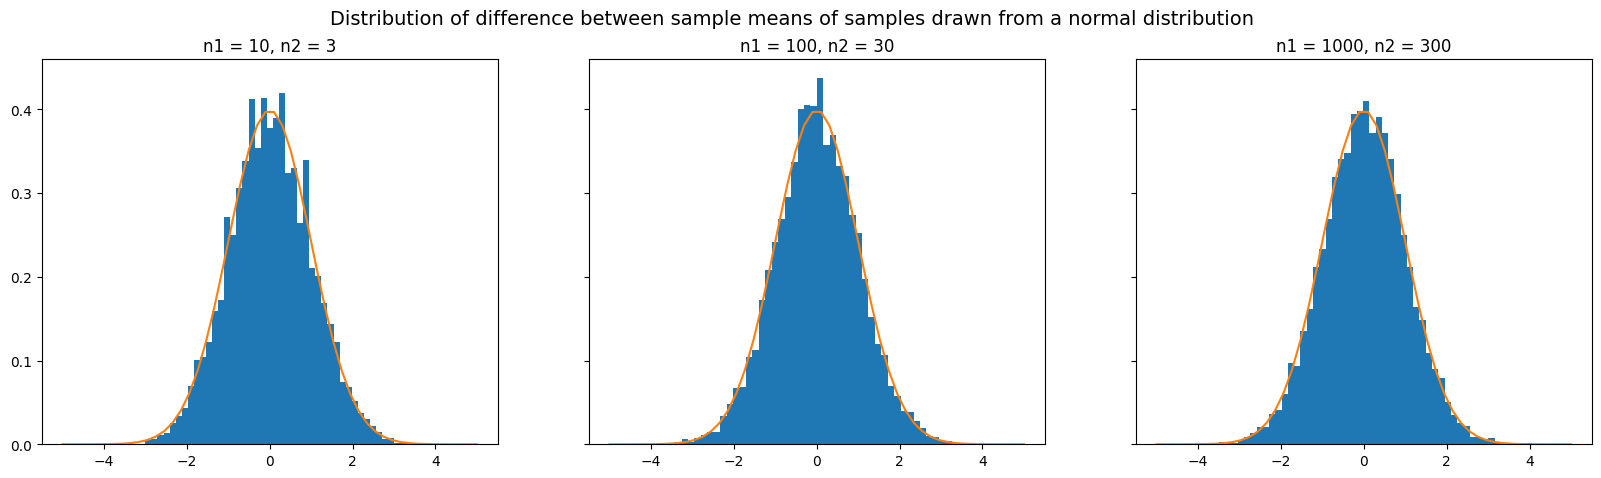

In [12]:
def plot_sample_diff(sampler1, sampler2, mu, sigma, num_samples=10000):
    _, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5), sharey=True)
    xs = np.linspace(-5, 5)
    ys = normal()(xs)
    for n1, n2, ax in zip([10, 100, 1000], [3, 30, 300], axs):
        sample_means = np.array(
            [sampler1(n1).mean() - sampler2(n2).mean() for _ in range(num_samples)]
        )
        ax.hist((sample_means - mu) / sigma(n1, n2), bins=50, density=True)
        ax.plot(xs, ys)
        ax.set_title(f"n1 = {n1}, n2 = {n2}")


n1 = 10
p1 = 0.3
n2 = 15
p2 = 0.6
d1 = dist.binomial().fx(n1, p1)
d2 = dist.binomial().fx(n2, p2)
mu1 = n1 * p1
mu2 = n2 * p2
sigma1 = n1 * p1 * (1 - p1)
sigma2 = n2 * p2 * (1 - p2)


def sampler1(sample_size):
    return sample(d1, np.arange(n1 + 1), sample_size)


def sampler2(sample_size):
    return sample(d2, np.arange(n2 + 1), sample_size)


plot_sample_diff(
    sampler1,
    sampler2,
    mu=mu1 - mu2,
    sigma=lambda s1, s2: sqrt(sigma1 / s1 + sigma2 / s2),
)
plt.suptitle(
    "Distribution of difference between sample means of samples drawn from a normal distribution",
    fontsize=14,
)
plt.show()

Once again, our simulation of drawing samples supports the above theorem.

## Chi-square distribution
The **chi-square** distribution with $n$ degrees of freedom has the probability density function as follows.
Note this function is not really important for our use, it's here simply for completeness.
We are more interested in how it is connected to the [sample variance](#sample-variance).
$$
f_X(x) = \frac{1}{2^{n/2} \Gamma (n/2)} x^{n/2-1} e^{-x/2}, \quad \text{for } x > 0
$$
0, otherwise

It is denoted by the symbol $\chi^2(n)$, where $n \in \mathbb{Z}_{\geq 0}$

In [13]:
import module.distribution.probability_function as pf

show_implementation(pf.chi_square)

def chi_square(df):
    return lambda x: (x ** (df/2-1) * np.exp(-x/2)) / (2 ** (df/2) * gamma(df/2))


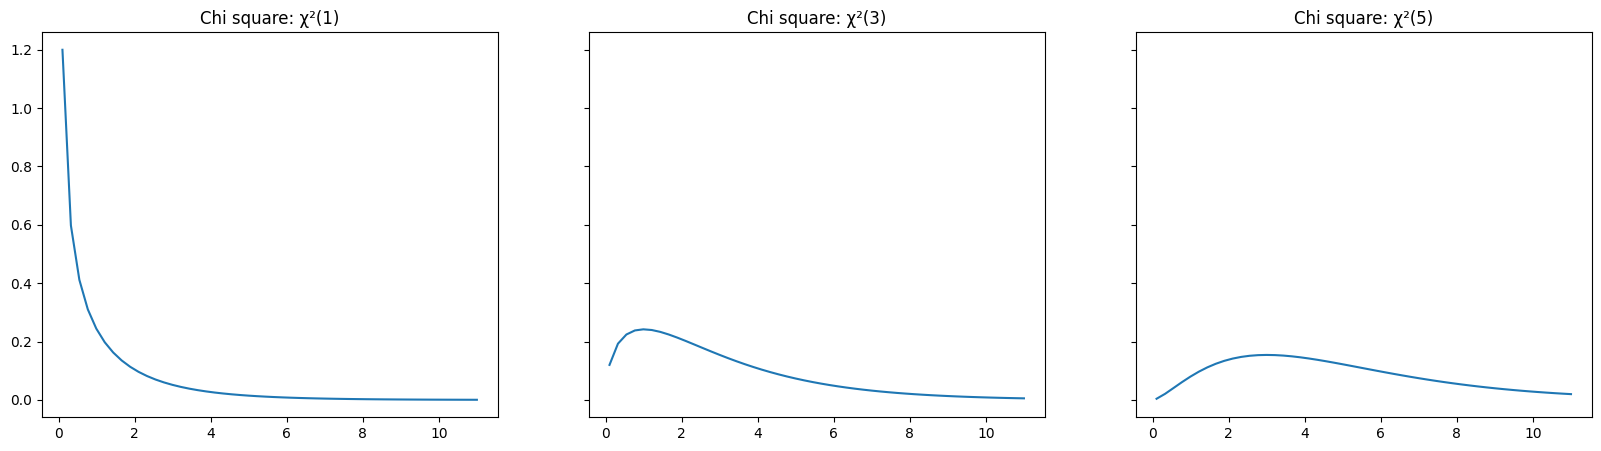

In [14]:
from module.utility import show_distribution

xs = np.linspace(0.1, 11)
show_distribution([dist.chi_square().f(xs, df) for df in (1, 3, 5)], xs)

The gamma function is defined as 
$$
\gamma(n) = \int ^ \infty _0 x^{n-1} e^{-x} dx
$$

Note that $\gamma(n) = (n-1)!$ for $n \in \mathbb{Z^+}$

In order words, it is factorial function extended for real numbers, but "shifted to the right by 1".

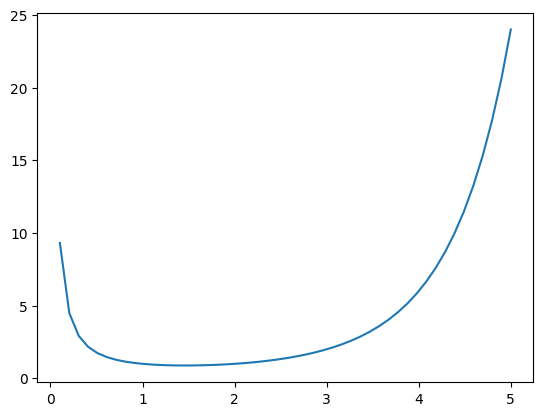

In [15]:
from scipy.special import gamma

xs = np.linspace(0, 5)
plt.plot(xs, gamma(xs))
plt.show()

### Properties
$$
E(X) = n \quad V(X) = 2n
$$

For large $n$, $\chi^2(n) \sim N(n, 2n)$ approximately


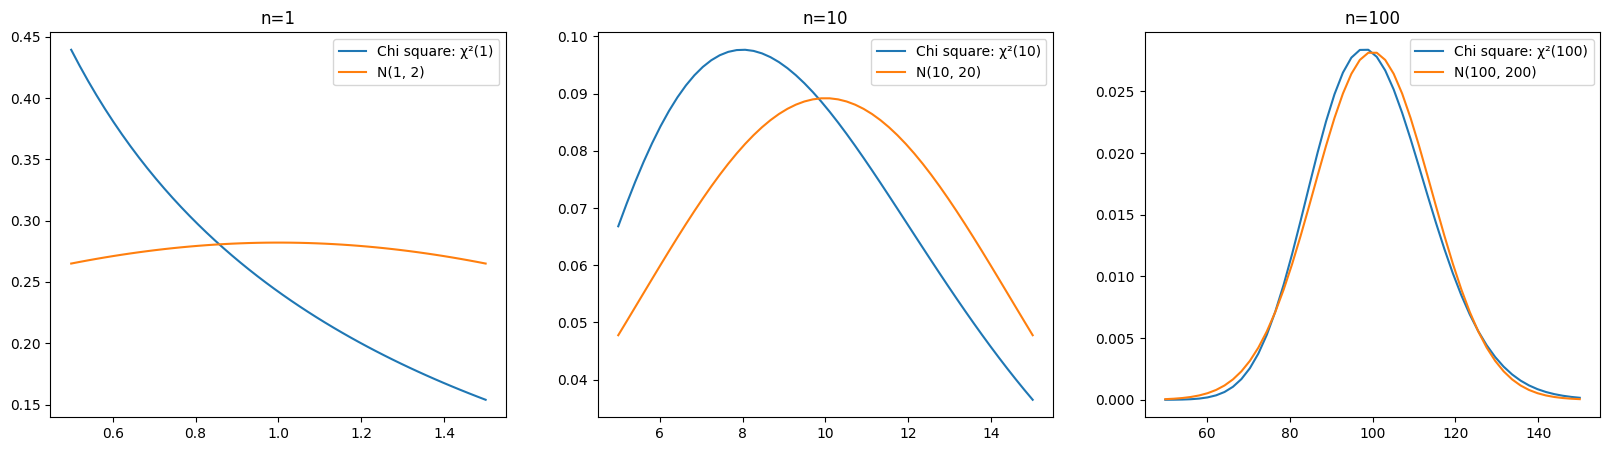

In [16]:
_, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

for n, ax in zip((1, 10, 100), axs):
    x = np.linspace(n / 2, n * 3 / 2)
    y = dist.chi_square().f(x, n)
    title, val = y
    ax.plot(x, val, label=title)
    ax.plot(x, normal(n, np.sqrt(2 * n))(x), label=f"N({n}, {2*n})")
    ax.set_title(f"n={n}")
    ax.legend()
plt.show()

<span id="chi-square-sum-prop"/>
If $X_1, \dot, X_k$ are independent chi-square random variables with $n_1, \dots n_k$ degrees of freedom, then $X_1 + \dots + X_k$ also has a chi-square distribution, with $n_1 + \dots n_k$ degrees of freedom.
Formally, it is 
$$
\sum X_i \sim \chi^2(\sum n_i)
$$

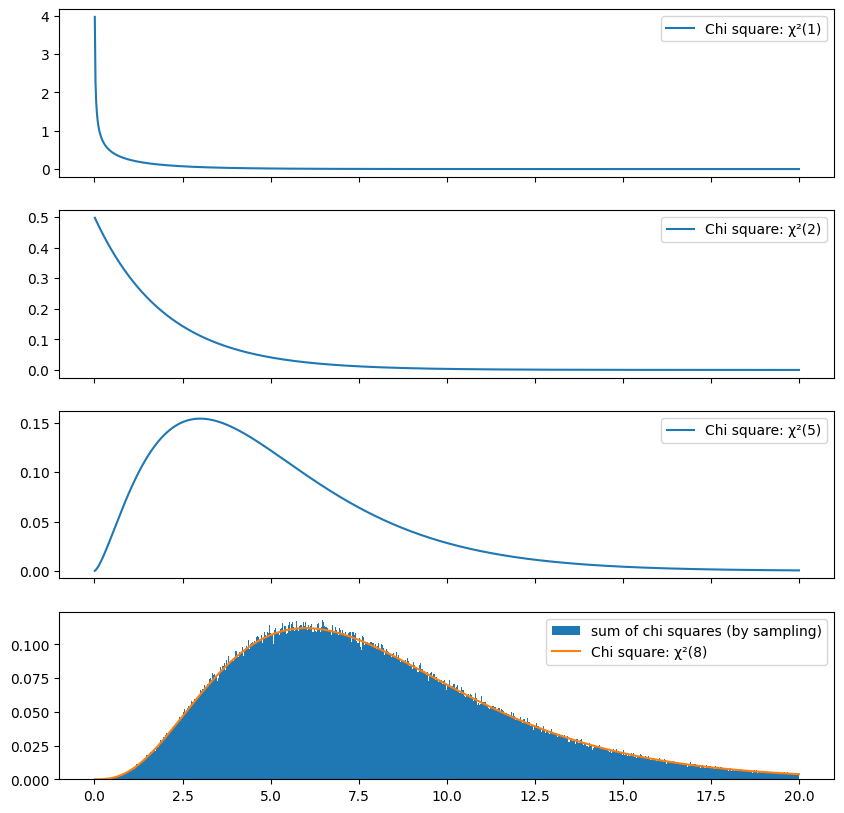

In [17]:
from scipy.stats import chi2

_, axs = plt.subplots(nrows=4, ncols=1, figsize=(10, 10), sharex=True)

ns = (1, 2, 5)
xs, step = np.linspace(0.01, 20, num=1000, retstep=True)

for n, ax in zip(ns, axs):
    y = dist.chi_square().f(xs, n)
    title, val = y
    ax.plot(xs, val, label=title)
    ax.legend()

sum_ax = axs[len(ns)]
samples = np.array([chi2.rvs(df=n, size=10**6) for n in ns])
samples = samples.sum(axis=0)
sum_ax.hist(
    samples,
    density=True,
    bins=1000,
    label="sum of chi squares (by sampling)",
    range=(0, 20),
)
summed = dist.chi_square().f(xs, sum(ns))
sum_ax.plot(xs, summed[1], label=summed[0])
sum_ax.legend()

plt.show()

Notice that the distribution of the sum of the chi-square random variables does resemble the chi-square random variable with 8 degrees of freedom. 

### Theorems <span id="chi-square-theorem"/>

* If $X \sim N(0,1)$, then $X^2 \sim \chi^2(1)$
    * By standardizing, if $X \sim N(\mu, \sigma^2)$, then $(\frac{X-\mu}{\sigma^2})^2 \sim \chi^2(1)$
    * By the property above, when given a sample $X_1, X_2, \dots , X_n$ from a normal distribution with mean $\mu$ and variance $\sigma^2$, $\sum (\frac{X_i - \mu}{\sigma^2})^2 \sim \chi^2(n)$

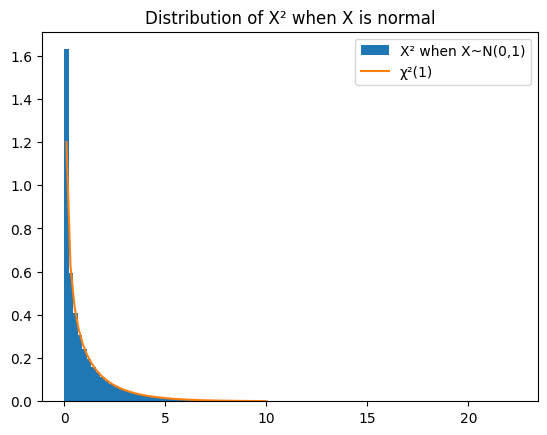

In [18]:
samples = norm.rvs(size=10**6, loc=0, scale=1)
samples = samples**2
xs = np.linspace(0.1, 10)
plt.hist(samples, density=True, bins=100, label="X² when X~N(0,1)")
plt.plot(xs, pf.chi_square(1)(xs), label="χ²(1)")
plt.title("Distribution of X² when X is normal")
plt.legend()
plt.show()

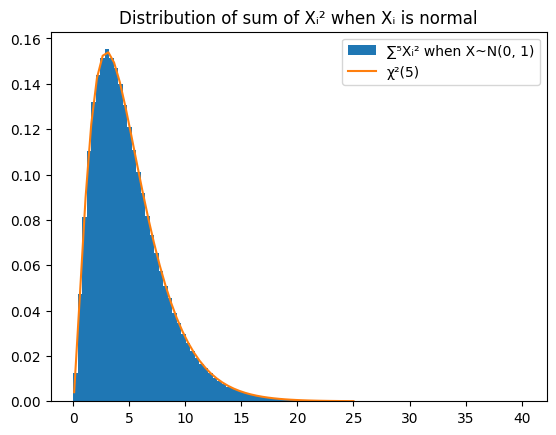

In [19]:
samples = np.array([norm.rvs(size=10**6, loc=0, scale=1) for _ in range(5)])
samples = samples**2
samples = samples.sum(axis=0)

xs = np.linspace(0.1, 25)
plt.hist(samples, density=True, bins=100, label="∑⁵Xᵢ² when X~N(0, 1)")
plt.plot(xs, pf.chi_square(5)(xs), label="χ²(5)")
plt.title("Distribution of sum of Xᵢ² when Xᵢ is normal")
plt.legend()
plt.show()

### Chi-square table
Suppose that $X \sim \chi^2(n)$.
We denote $\chi^2(n;\alpha)$ as the **constant** value that satisfy $Pr(X \geq \chi^2(n;\alpha)) = \alpha$.
That is, given some probability $\alpha$, we wish to find the constant for the variable $X$ such that the probability of the random variable $X$ being larger than this constant in a chi-square distribution is $\alpha$.

Similarly, $\chi^2(n; 1-\alpha)$ correspond to the constant that satisfy $Pr(X \leq \chi^2(n;1-\alpha)) = \alpha$.

## Sample variance <span id="sample-variance"/>

Given a random sample $X_1, \dots, X_n$, the **sample variance** is defined as 
$$
S^2 = \frac{1}{n-1}\sum(X_i - \bar X)^2
$$

However, the distribution of the sample variance has little practical use in statistics.
Instead, we are interested in the sample distribution of the random variable $\frac{(n-1)S^2}{\sigma^2}$ when all $X_i \sim N(\mu, \sigma^2)$.


The reason we are looking at this particular random variable is because when all the samples are drawn from a normal distribution, then 
$$\frac{(n-1)S^2}{\sigma^2} \sim \chi^2(n-1)$$
Note that this is not derived directly from [this theorem](#chi-square-theorem), since it is uses the population mean while we are using the sample mean here.
The actual proof can be obtained [here](https://statproofbook.github.io/P/norm-chi2), which is beyond the scope of this topic.

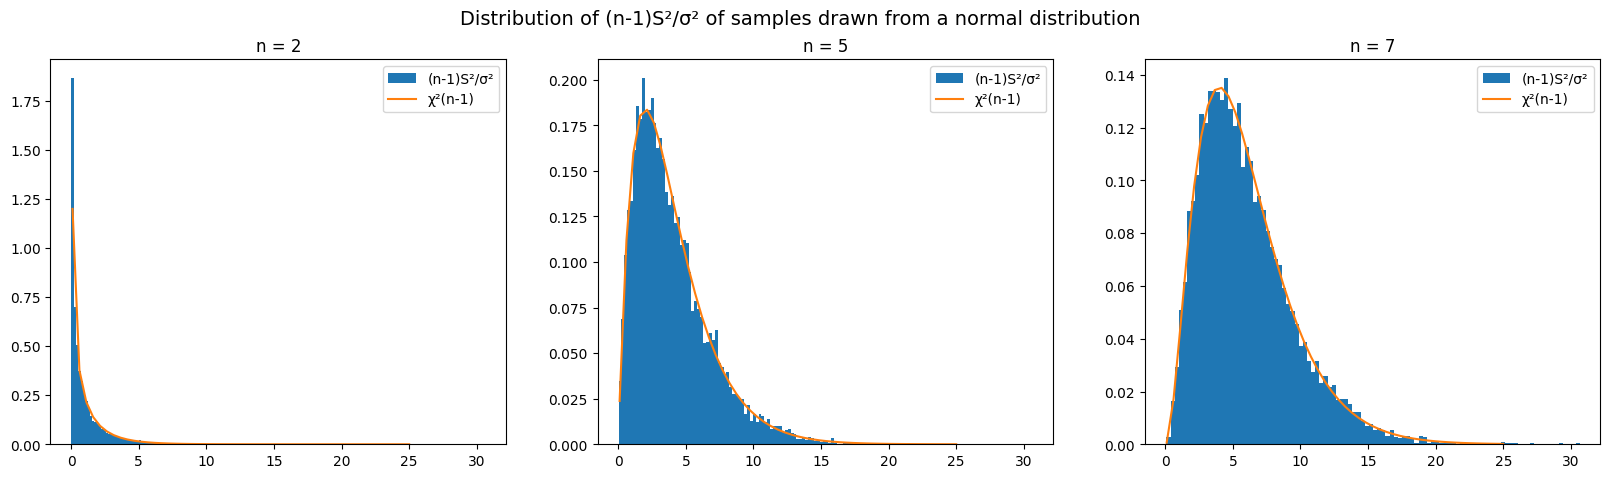

In [20]:
num_samples = 10000
xs = np.linspace(0.1, 25)

_, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5), sharex=True)

for n, ax in zip((2, 5, 7), axs):
    samples = np.array([norm.rvs(size=n, loc=0, scale=1) for _ in range(num_samples)])
    sample_vars = np.square(samples - samples.mean(axis=1).reshape(num_samples, 1)).sum(
        axis=1
    ) / (n - 1)
    d = sample_vars * (n - 1) / 1

    ax.hist(d, density=True, bins=100, label="(n-1)S²/σ²")
    ax.plot(xs, pf.chi_square(n - 1)(xs), label="χ²(n-1)")
    ax.set_title(f"n = {n}")
    ax.legend()

plt.suptitle(
    "Distribution of (n-1)S²/σ² of samples drawn from a normal distribution",
    fontsize=14,
)
plt.show()

We can see again that our experiment supports the above theorem.

## t-distribution <span id="t-dist"/>
Let $Z \sim N(0,1)$, and $U \sim \chi^2(n)$.
If $Z$ and $U$ are independent, then the **t-distribution** with $n$ degrees of freedom is exhibited by the random variable
$$
T = \frac{Z}{\sqrt{U/n}}
$$

The probability density function of a $t$-distribution is given by
$$
f_T(t) = \frac{\Gamma((n+1)/2)}{\sqrt{n \pi} \Gamma(n/2)} (1+\frac{t^2}{n})^{-(n+1)/2}, \quad -\infty < t < \infty
$$

Once again, this formula is only here for completeness.

### Properties
* The graph of the $t$-distribution is symmetric about $t=0$
* As $n \to \infty$, $f_T(t) \to \frac{1}{\sqrt{2\pi}}e^{-t^2/2}$, which is simply the standard normal distribution
* If $T \sim t(n)$, then $E(T) = 0, V(T) = n/(n-2)$ for $n>2$

In [21]:
show_implementation(pf.t)

def t(n):
    return lambda x: gamma((n+1)/2) / (np.sqrt(n * np.pi) * gamma(n/2)) * (1 + x **2/n)**(-(n+1)/2) 


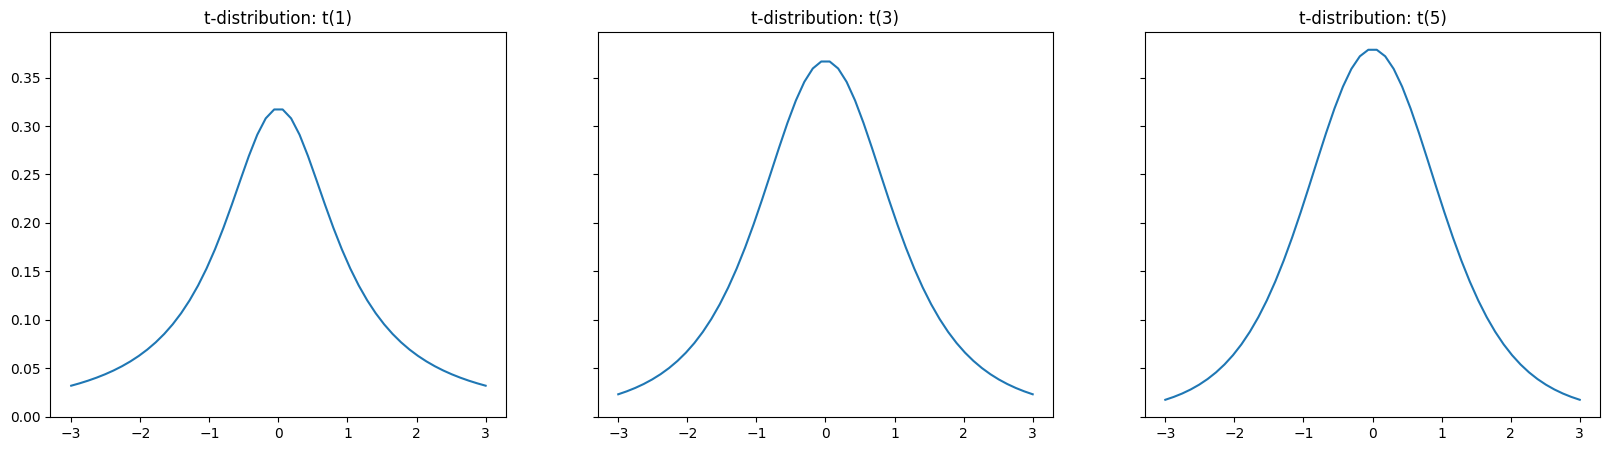

In [22]:
xs = np.linspace(-3, 3)
show_distribution([dist.t().f(xs, n) for n in (1, 3, 5)], xs)

As we can see, it looks rather similar to the normal distribution, but slightly "sharper".

### Connection to sampling
If $X$ is drawn from a **normal** population, then by considering the following random variables
$$
Z = \frac{\bar X - u}{\sigma / \sqrt n} \sim N(0, 1)
$$

$$
U = \frac{(n-1)S^2}{\sigma^2} \sim \chi^2(n-1)
$$

We can show that $\bar X$ and $S^2$ are independent, and thus so are $Z$ and $U$.

Hence, suppose we consider $T = \frac{\bar X - \mu}{S/\sqrt n}$, then notice
$$
T = \frac{\bar X - \mu}{S/\sqrt n} = \frac{Z}{\sqrt{U / (n-1)}} \sim t_{n-1}
$$

Given a random sample $X_1, \dots, X_n$, the **sample variance** is defined as 
$$
S^2 = \frac{1}{n-1}\sum(X_i - \bar X)^2
$$

<details>
    <summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
$$
\begin{align}
\frac{\bar X - \mu}{S/\sqrt n} &= \frac{Z \sigma/\sqrt n}{ S / \sqrt{n}} & \bar X = \frac{Z \sigma}{\sqrt n} + \mu \\
&= \frac{Z \sigma}{ S } &  \\
&= \frac{Z \sigma}{ \sqrt{ \sigma^2/(n-1)}} & S = \sqrt{\frac{U \sigma^2}{n-1}} \\
&= \frac{Z \sigma}{\sqrt{U} \sigma/\sqrt{n-1}} &  \\ 
&= \frac{Z }{\sqrt{U (n-1)}} &  \\ 
& QED &
\end{align}
$$
    </div>
</details>

Notice that the above theorem is true regardless of the value of $n$.
Thus, $t$-distribution is very useful if our sample size is small, where we cannot apply central limit theorem.
It allows us to draw some inference about the underlying normal distribution in spite of small sample size.

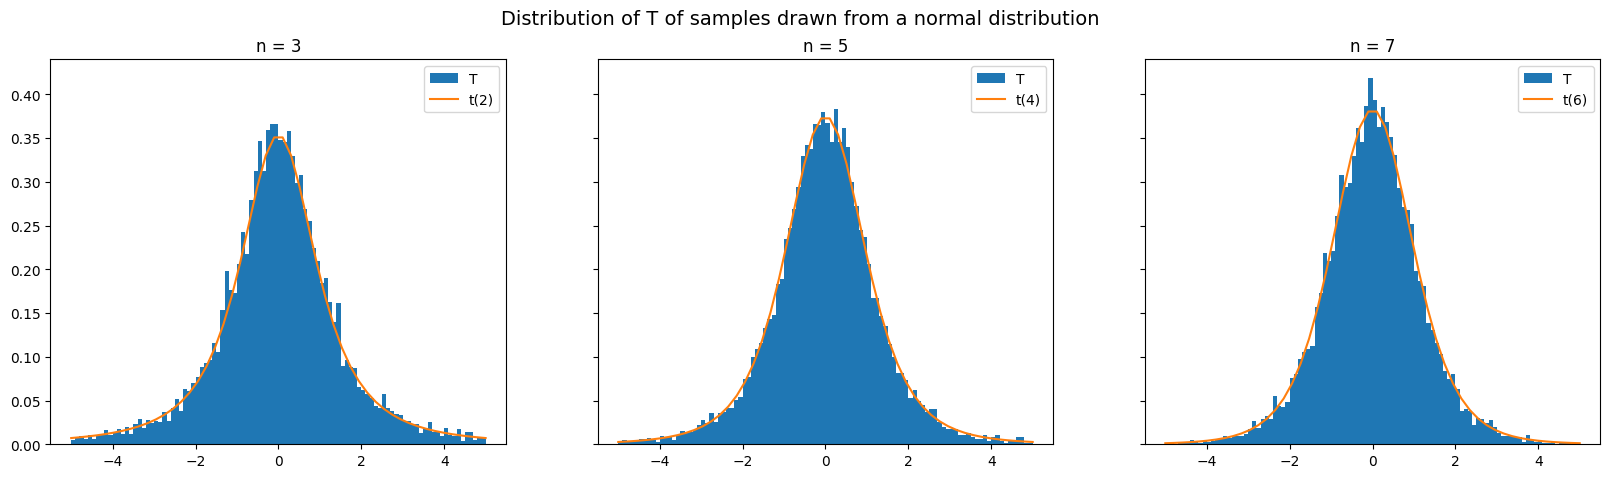

In [23]:
num_samples = 10**4
xs = np.linspace(-5, 5)

_, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5), sharex=True, sharey=True)

for n, ax in zip((3, 5, 7), axs):
    samples = np.array([norm.rvs(size=n, loc=0, scale=1) for _ in range(num_samples)])
    sample_means = samples.mean(axis=1).reshape(num_samples, 1)
    sample_vars = ((samples - sample_means) ** 2).sum(axis=1) / n
    d = sample_means.ravel() / (np.sqrt(sample_vars / (n - 1)))

    ax.hist(d, density=True, bins=100, label="T", range=(-5, 5))
    ax.plot(xs, pf.t(n - 1)(xs), label=f"t({n-1})")
    ax.set_title(f"n = {n}")
    ax.legend()

plt.suptitle(
    "Distribution of T of samples drawn from a normal distribution", fontsize=14
)
plt.show()

Once again, our experiment validates our theorem.

## F-distribution

Let $U \sim \chi^2(n_1), V \sim \chi^2(n_2)$, then the **F-distribution** with $(n_1, n_2)$ degrees of freedom is exhibited by the random variable
$$
F = \frac{U/n_1}{V/n_2}
$$

The probability density function is defined as
$$
f_F(x) = \frac{n_1^{n_1/2}n_2^{n_2/2}\Gamma((n_1+n_2)/2)}{\Gamma(n_1/2) \Gamma(n_2/2)}\frac{x^{n_1/2 -1}}{(n_1x+n_2)^{(n_1+n_2)/2}}
$$

Once again, this formula is only here for completeness.

In [24]:
show_implementation(pf.F)

def F(n1, n2):
    def func(x):
        top_left = n1 ** (n1 / 2) * n2 ** (n2/2) *gamma((n1 + n2)/2)
        bottom_left = gamma(n1 / 2) * gamma(n2/2)
        top_right = x **(n1/2 - 1)
        bottom_right = (n1 * x + n2) **((n1 + n2)/2)
        return top_left * top_right / bottom_left / bottom_right
    return func


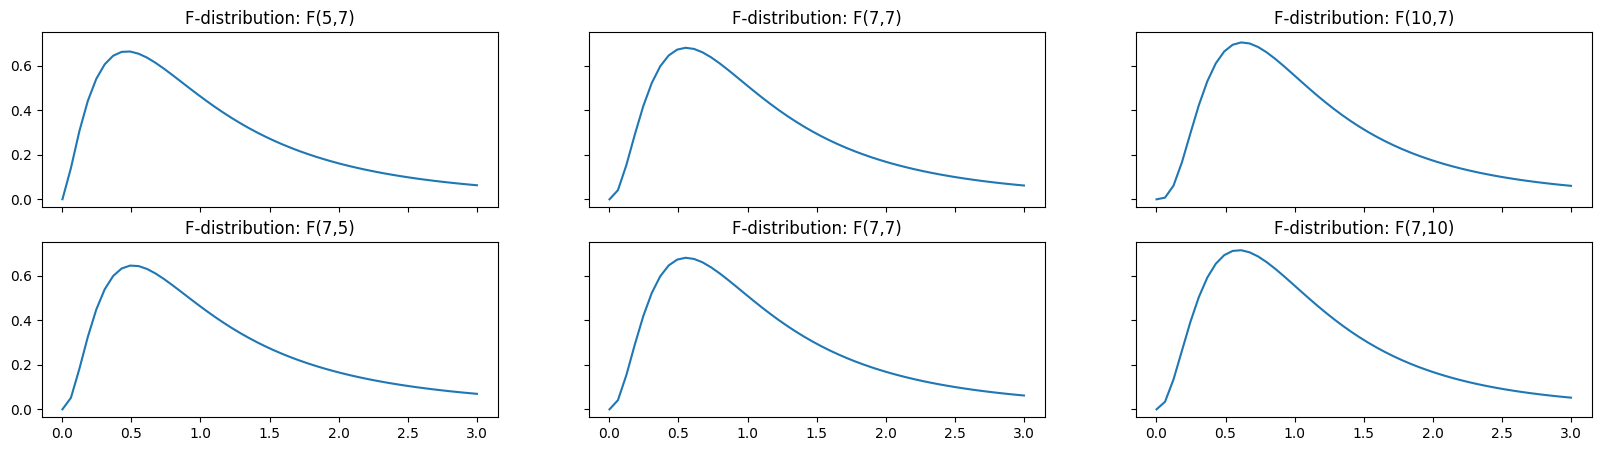

In [25]:
xs = np.linspace(0.001, 3)


def show_grid(fs, grid):
    fig, axss = plt.subplots(
        nrows=len(fs), ncols=len(fs[0]), figsize=(20, 5), sharex=True, sharey=True
    )

    for ff, axs in zip(fs, axss):
        for f, ax in zip(ff, axs):
            title, val = f
            ax.plot(xs, val)
            ax.set_title(title)
    plt.show()


d_n1 = [dist.F().f(xs, n1, 7) for n1 in (5, 7, 10)]
d_n2 = [dist.F().f(xs, 7, n2) for n2 in (5, 7, 10)]
ys = [d_n1, d_n2]
show_grid(ys, xs)

### Connection to sampling
Suppose that we have two random samples of size $n_1,n_2$ respectively, obtained from two **normal** population with variance $\sigma_1^2, \sigma_2^2$ respectively.

We know that 
$$
U = \frac{(n_1-1)S_1^2}{\sigma^2_1} \sim \chi^2(n_1-1)
$$
$$
V = \frac{(n_2-1)S_2^2}{\sigma^2_2} \sim \chi^2(n_2-1)
$$
and are independent.

Hence, we have 
$$
F = \frac{U/(n_1-1)}{V/(n_2-1)} = \frac{S_1^2/\sigma_1^2}{S_2^2/\sigma^2_2} \sim F(n_1-1, n_2-1)
$$

Thus, $F$-distribution is used when we wish to investigate the relationship of variances of two distributions.

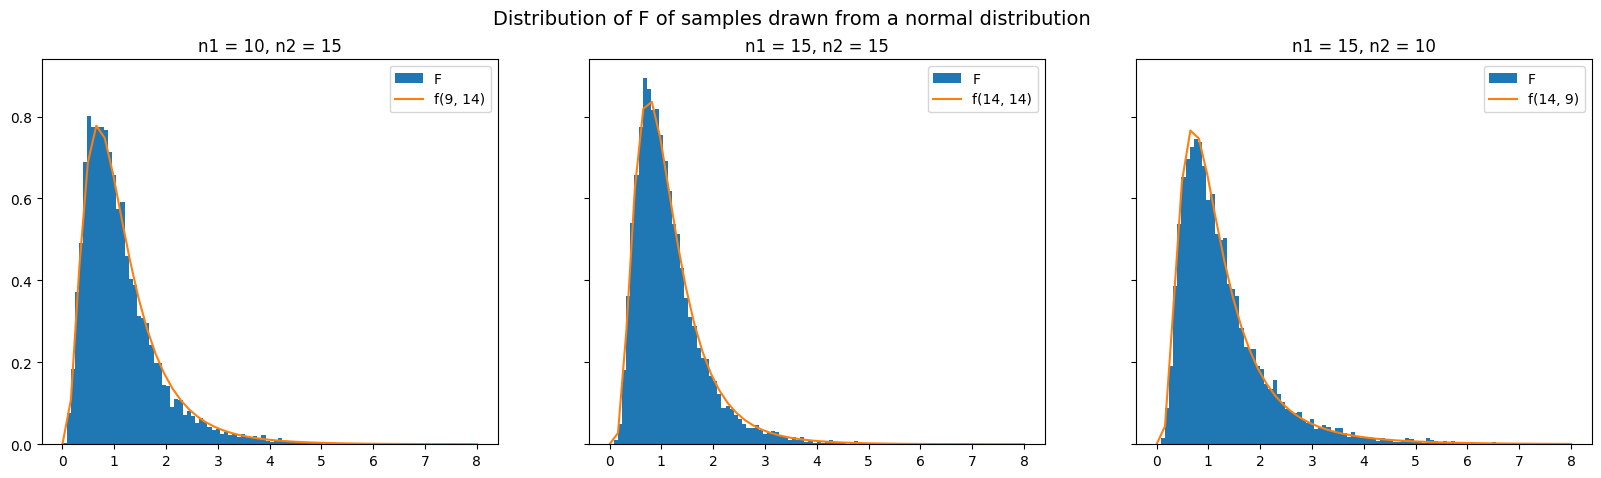

In [26]:
num_samples = 10**4
xs = np.linspace(0, 8)

_, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5), sharex=True, sharey=True)

for (n1, n2), ax in zip(((10, 15), (15, 15), (15, 10)), axs):
    n1_samples = np.array(
        [norm.rvs(size=n1, loc=0, scale=1) for _ in range(num_samples)]
    )
    n1_sample_means = n1_samples.mean(axis=1).reshape(num_samples, 1)
    n1_sample_vars = ((n1_samples - n1_sample_means) ** 2).sum(axis=1) / n1

    n2_samples = np.array(
        [norm.rvs(size=n2, loc=0, scale=1) for _ in range(num_samples)]
    )
    n2_sample_means = n2_samples.mean(axis=1).reshape(num_samples, 1)
    n2_sample_vars = ((n2_samples - n2_sample_means) ** 2).sum(axis=1) / n2

    d = n1_sample_vars / n2_sample_vars

    ax.hist(d, density=True, bins=100, label="F", range=(0, 8))
    ax.plot(xs, pf.F(n1 - 1, n2 - 1)(xs), label=f"f({n1-1}, {n2-1})")
    ax.set_title(f"n1 = {n1}, n2 = {n2}")
    ax.legend()

plt.suptitle(
    "Distribution of F of samples drawn from a normal distribution", fontsize=14
)
plt.show()

### Theorems
If $F \sim F(n,m)$, then $1/F \sim F(m, n)$